# Citation Network Analysis
<br><br>
In this notebook we are going to explore the citation analysis in “Climate Change Mitigation” using Scopus API in
the last five years.<br> This notebook is part of Social Network analysis course project.

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

plt.style.use('ggplot')

1. 
Construct a small database containing the list of papers outputted by the API as output
the query “climate change mitigation” with title, author names and country of the
affiliation and a list of keywords, if available. 

In [31]:
# Read data to pandas dataframe
data = pd.read_csv('scopus.csv')

# Print first 5 rows of raw data
data.head()


,Authors,Author(s) ID,Title,Year,Source title,Volume,Issue,Art. No.,Page start,Page end,...,ISBN,CODEN,PubMed ID,Language of Original Document,Abbreviated Source Title,Document Type,Publication Stage,Open Access,Source,EID
0,"Monerie P.-A., Pohl B., Gaetani M.",36995939400;8934032500;15319055900;,The fast response of Sahel precipitation to cl...,2021,npj Climate and Atmospheric Science,4,1,24,NaN,NaN,...,NaN,NaN,NaN,English,npj Clim. Atmos. Sci.,Article,Final,"All Open Access, Gold, Green",Scopus,2-s2.0-85103988374
1,"Koh L.P., Zeng Y., Sarira T.V., Siman K.",7004786474;55344338300;57217291359;57222126865;,Carbon prospecting in tropical forests for cli...,2021,Nature Communications,12,1,1271,NaN,NaN,...,NaN,NaN,33627656.0,English,Nat. Commun.,Article,Final,"All Open Access, Gold, Green",Scopus,2-s2.0-85101550210
2,"Zvobgo L., Tsoka J.",57219534369;57201192530;,Deforestation rate and causes in Upper Manyame...,2021,"Trees, Forests and People",5,NaN,100090,NaN,NaN,...,NaN,NaN,NaN,English,Tree. For. People.,Article,Final,NaN,Scopus,2-s2.0-85104576122
3,"West T.A.P., Salekin S., Melia N., Wakelin S.J...",55970453700;56664449200;56862288100;7005793487...,Diversification of forestry portfolios for cli...,2021,Journal of Environmental Management,289,NaN,112482,NaN,NaN,...,NaN,JEVMA,33813299.0,English,J. Environ. Manage.,Article,Final,NaN,Scopus,2-s2.0-85103643397
4,Basupi I.,55602343700;,Implications of Climate Change Mitigation and ...,2021,Journal of Infrastructure Systems,27,2,04021009,NaN,NaN,...,NaN,NaN,NaN,English,J. Infrastruct. Syst.,Article,Final,NaN,Scopus,2-s2.0-85103308527


In [32]:
# Select columns that we want to use
data = data.iloc[:, [0, 1, 2, 14, 15, 17]]


In [33]:
#make strings lowercase to help in comparing
data["Author Keywords"] = data["Author Keywords"].str.lower()
data["Authors"] = data["Authors"].str.lower()

In [34]:
data.tail()

,Authors,Author(s) ID,Title,Affiliations,Authors with affiliations,Author Keywords
750,"dedinec a., taseska-gjorgievska v., markovska ...",55447959200;26430113800;22994164800;5709264690...,Towards post-2020 climate change regime: Analy...,Research Center for Energy and Sustainable Dev...,"Dedinec, A., Research Center for Energy and Su...",climate change mitigation; eu targets; markal ...
751,creutzig f.,23995215600;,Economic and ecological views on climate chang...,Mercator Research Institute on Global Commons ...,"Creutzig, F., Mercator Research Institute on G...",beccs; bioenergy; biophysical limits; climate ...
752,ekholm t.,23569259100;,Optimal forest rotation age under efficient cl...,"VTT Technical Research Centre of Finland, VTT,...","Ekholm, T., VTT Technical Research Centre of F...",carbon pricing; climate change mitigation; opt...
753,"kaspersen b.s., jacobsen t.v., butts m.b., boe...",56901402800;18433965900;7004354427;55887715600...,Integrating climate change mitigation into riv...,"Department of Environmental, Social and Spatia...","Kaspersen, B.S., Department of Environmental, ...",agriculture; climate change mitigation; decisi...
754,"lindstad h., bright r.m., strømman a.h.",57204851094;34976345200;8699301400;,Economic savings linked to future Arctic shipp...,Norwegian Marine Technology Research Institute...,"Lindstad, H., Norwegian Marine Technology Rese...",arctic; emissions; greenhouse gases; gwp; imo;...


In [35]:
data.info()
# Save new dataframe to csv file
data.to_csv('parsed_data.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 755 entries, 0 to 754
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Authors                    755 non-null    object
 1   Author(s) ID               755 non-null    object
 2   Title                      755 non-null    object
 3   Affiliations               750 non-null    object
 4   Authors with affiliations  754 non-null    object
 5   Author Keywords            640 non-null    object
dtypes: object(6)
memory usage: 35.5+ KB


<br>Next we would like to analyze how authors compare to each other in terms of number of publications and what kind of keywords are used in these papers. However we notice that certian columns contain multiple wanted elements in each row. These values are Authors, Author(s) ids and Author keywords. Next we need to compose some kind of lists from the information given in data file. Let's start by exploding these columns into lists where don't care about relations between these objects and clean up the data<br>

In [36]:
data['Author(s) ID'] = data['Author(s) ID'].str.split(';')
data['Authors'] = data['Authors'].str.split(', ')
data['Author Keywords'] = data['Author Keywords'].str.split('; ')

In [37]:
#When iterating to list, we need to remember remove empty value from cell
data['Author(s) ID'].head()

0             [36995939400, 8934032500, 15319055900, ]
1    [7004786474, 55344338300, 57217291359, 5722212...
2                         [57219534369, 57201192530, ]
3    [55970453700, 56664449200, 56862288100, 700579...
4                                      [55602343700, ]
Name: Author(s) ID, dtype: object

In [38]:
res_ids = data.explode('Author(s) ID').reset_index(drop=True)
res_authors = data.explode('Authors').reset_index(drop=True)
res_keywords = data.explode('Author Keywords')

author_ids = res_ids['Author(s) ID'].values.tolist()
authors = res_authors['Authors'].values.tolist()
keywords = res_keywords["Author Keywords"].values.tolist()

In [39]:
# remove empty strings mentioned above
author_ids = list(filter(None, author_ids))
authors = list(filter(None, authors))
keywords = [x for x in keywords if str(x) != 'nan']

In [40]:
#check match
#print(Counter(author_ids))
print(len(author_ids))
print(len(authors))

#We can see from discrepancy of values below there is misspelling of author names
#Logical way to bypass the problem is to use Author IDs in comparison and get the names with API call

3217
3220


In [41]:
#Needs working VPN connection to university servers (who has subscription) to get authorized access token.
from pybliometrics.scopus import AuthorRetrieval

#name = AuthorRetrieval(55447959200)
#print(name.affiliation_current[0][8]) get country of author

In [42]:
#We need to create dictionary, we can cross-check authors id to a name

#WARNING! This will throw error if VPN is not connected
"""" Takes too long, instead get names when you know exact ids
for id in author_ids:
    s = AuthorRetrieval(id)
    author_names.append(s.indexed_name)
    counter += 1
    clear_output(wait=True)
    print("{}/3206".format(counter))
"""

'" Takes too long, instead get names when you know exact ids\nfor id in author_ids:\n    s = AuthorRetrieval(id)\n    author_names.append(s.indexed_name)\n    counter += 1\n    clear_output(wait=True)\n    print("{}/3206".format(counter))\n'

<br>Now we can count how many times one author is mentioned in publication and plot results to histogram. **Note** that only first 300 authors are included in plot. Rest of the authors had their name mentioned once in this dataset<br>

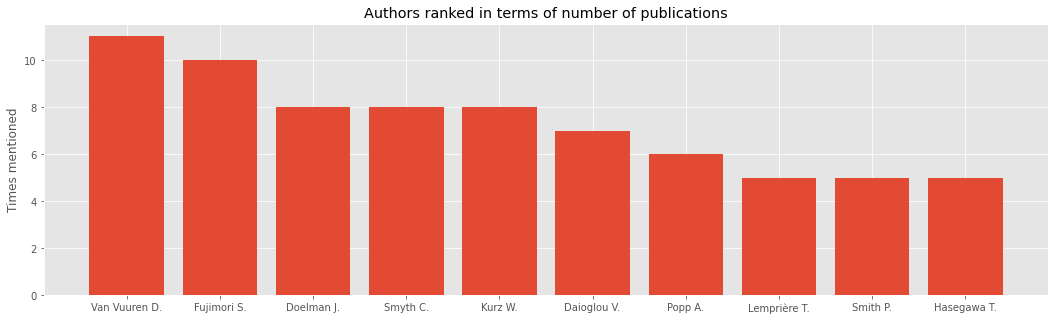

In [43]:
auth_counter = Counter(author_ids)
frequent_names, frequent_counts = zip(*auth_counter.most_common(10))
author_names = []

for index in range(10):
    s = AuthorRetrieval(frequent_names[index])
    author_names.append(s.indexed_name)
    
y_pos = np.arange(len(frequent_names))

fig, ax = plt.subplots(figsize=(18,5))
plt.bar(y_pos, frequent_counts, align='center')
plt.xticks(y_pos, author_names)
plt.ylabel('Times mentioned')
plt.title('Authors ranked in terms of number of publications')
plt.show()

distinct collaberators


In [46]:
#remove whitespaces from data
cleaned_data = []

for author in data["Author(s) ID"]:
    temp_list = []
    
    for value in author:
        
        if value and value.strip():
            temp_list.append(value)
    cleaned_data.append(temp_list)
    

In [48]:
import itertools
collaberators = []

for authors in cleaned_data:
    for combination in itertools.combinations(authors, 2):
        collaberators.append((combination[0],combination[1]))  

In [53]:
import collections
combination_list = []

for authors in cleaned_data:
    for combination in itertools.combinations(authors, 2):
        combination_list.append(combination)
        

In [54]:
fixed_list = list(set([i for i in combination_list]))

erdo_authors = []
for elem in fixed_list:
    erdo_authors.append(elem[0])
    erdo_authors.append(elem[1])

In [73]:
connection_counter = Counter(erdo_authors)
frequent_author, frequent_connection = zip(*connection_counter.most_common(300))


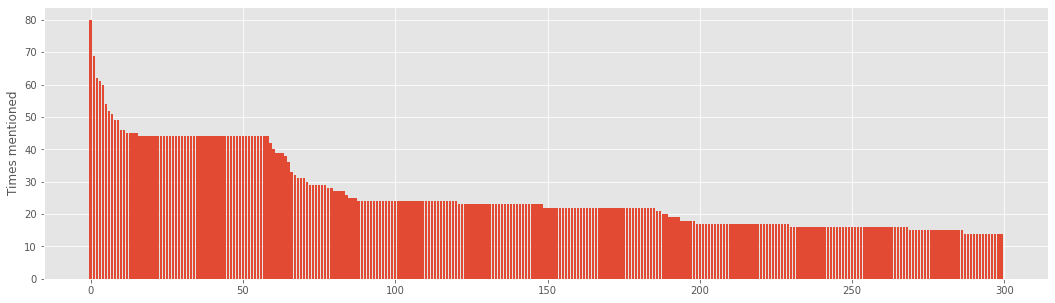

In [74]:
plot_list = []
#for index in range(10):
    #s = AuthorRetrieval(frequent_author[index])
    #plot_list.append(s.indexed_name)
    
fig, ax = plt.subplots(figsize=(18,5))
plt.bar(np.arange(len(frequent_author)), frequent_connection, align='center')
#plt.xticks(np.arange(len(plot_list)), plot_list)
plt.ylabel('Times mentioned')
plt.show()

<br>Let's also print the keyword occurences and check which keywords were the most popular ones.<br>

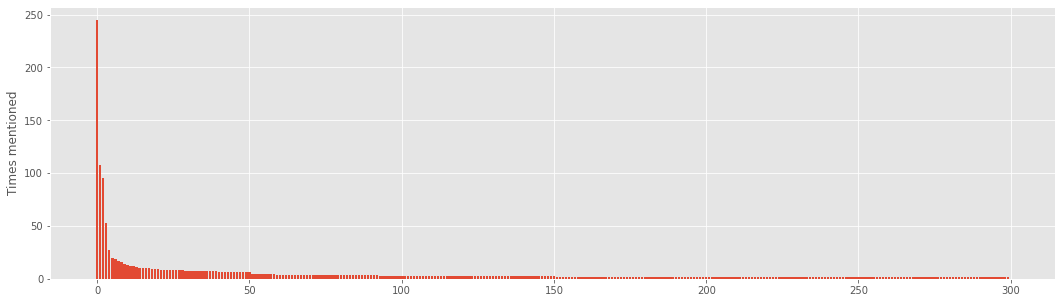

In [44]:
keyword_counter = Counter(keywords)
frequent_keywords, frequent_wordcounts = zip(*keyword_counter.most_common(300))

fig, ax = plt.subplots(figsize=(18,5))
plt.bar(np.arange(len(frequent_keywords)), frequent_wordcounts, align='center')
plt.ylabel('Times mentioned')
plt.show()

In [45]:
print("Most popular keywors:\n")
for i in range(30):
    print("{}. {}".format(i+1, frequent_keywords[i]))

Most popular keywors:

1. climate change
2. climate change mitigation
3. mitigation
4. adaptation
5. agriculture
6. carbon sequestration
7. climate policy
8. renewable energy
9. sustainability
10. greenhouse gas emissions
11. bioenergy
12. paris agreement
13. redd+
14. food security
15. biomass
16. sustainable development
17. emissions
18. greenhouse gas
19. co2 emissions
20. energy efficiency
21. governance
22. climate change adaptation
23. carbon footprint
24. life cycle assessment
25. climate mitigation
26. resilience
27. vulnerability
28. carbon
29. co-benefits
30. carbon stock


### Construct graph

5. Provide in a table the global attributes of this graph in terms of number of nodes,
edges, largest component, average degree centrality, global clustering coefficient,
diameter, average path length.

In [19]:
import networkx as nx

In [20]:
publication_participants = data['Author(s) ID'].values.tolist()
publication_participants = list(filter(None, publication_participants))

graph = nx.Graph()

#TODO: figure something less spaghetti
for i in range(len(publication_participants)):
    if len(publication_participants[i]) > 1:
        for j in range(len(publication_participants[i])):
            for k in range(len(publication_participants[i])):
                if(publication_participants[i][j] != None  and publication_participants[i][k] != None):
                    graph.add_node(publication_participants[i][k])
                    if (k+j) < len(publication_participants[i]):
                        graph.add_edge(publication_participants[i][j], publication_participants[i][k+j])
                        

In [21]:
print("Total number of nodes: " + str(len(graph.nodes)))
print("Total number of edges: " + str(len(graph.edges)))

print("------------")
print(nx.info(graph))
print("------------")
print("Largest connected component: TODO")



print("Global clustering coefficient: " + str(round(nx.average_clustering(graph), 4))) # average clustering coefficient
print("Graph diameter: " + str(nx.diameter(graph)))
print("Average path length: " + str(round(nx.average_shortest_path_length(graph), 4))) #average path length

Total number of nodes: 2823
Total number of edges: 15080
------------
Name: 
Type: Graph
Number of nodes: 2823
Number of edges: 15080
Average degree:  10.6837
------------
Largest connected component: TODO
Global clustering coefficient: 0.9544
Graph diameter: 2


KeyboardInterrupt: 

In [ ]:
#Average degree centrality
res = 0
dict_degree_centrality = nx.degree_centrality(graph)

for value in dict_degree_centrality.values():
    res += value
    
avg_degree_cent = res / len(dict_degree_centrality)

print("Average degree centrality: " + str(round(avg_degree_cent, 4)))

Table of global atributes 

| Atribute | | Value |
| :-- | --- | :-: |
| Number of nodes |  | 2823 |
| Number of edges |  | 15080 |
| Largest component |  | TODO |
| Average degree centrality |  | 0.0038 |
| Global clustering coefficient |  | 0.9544 |
| Graph diameter |  | 2.000 |
| Average path length |  | 1.997 |

In [ ]:
#heitti errorin että vaatii scipy:n "pip install scipy"
#nx.draw(graph, node_color="red")
pos = nx.spring_layout(graph)
betCent = nx.betweenness_centrality(graph, normalized=True, endpoints=True)
node_color = [20.0 * graph.degree(v) for v in graph]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(graph, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')

plt.show()
#En ole tyytyväinen tähän, seuraava pitäisi olla parempi t:Emil

In [ ]:
#remove whitespaces from data
cleaned_data = []

for author in data["Author(s) ID"]:
    temp_list = []
    
    for value in author:
        
        if value and value.strip():
            temp_list.append(value)
    cleaned_data.append(temp_list)
    

In [ ]:
import itertools

G = nx.Graph()
for authors in cleaned_data:
    for combination in itertools.combinations(authors, 2):
        G.add_edge(combination[0],combination[1])  


        
print(nx.info(G))    

In [ ]:

pos = nx.spring_layout(G)
betCent = nx.betweenness_centrality(G, normalized=True, endpoints=True)
node_color = [2000.0 * graph.degree(v) for v in G]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(G, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')
plt.savefig("graph.pdf")

plt.show()


6. Using the concept of Erdo-number, identify the author who has got the largest number
of collaborators (co-authored the papers) and assume this author will be assigned
Erdos number 0 and direct co-authors will be assigned Erdos number 1, while other
authors who co-authors with the first collaborators and not with that of Erdos number
0, will be assigned Erdos number 2, etc.. Draw the distribution of this new Erdos
number in terms of number authors that fall in each Erdos number category.


In [ ]:
import collections
combination_list = []

for authors in cleaned_data:
    for combination in itertools.combinations(authors, 2):
        combination_list.append(combination)
        


In [ ]:
Counter(combination_list) #samoja yhteyksiä on monella kirjoittajalla

In [ ]:
fixed_list = list(set([i for i in combination_list]))

erdo_authors = []
for elem in fixed_list:
    erdo_authors.append(elem[0])
    erdo_authors.append(elem[1])

In [ ]:

print(erdo_authors)


In [ ]:
my_count = pd.Series(erdo_authors).value_counts()
print(my_count)

In [ ]:
#Author 7003501910 having most connections will be given erdo number of 0. Lets search all the tuples with with that
#author id and give their co-author erdo number 1

In [ ]:
#list of connections to erdo 0
list_erdoFirts = []

for item in fixed_list: 
    if "7003501910" in item:
        if item[0] == "7003501910":
            list_erdoFirts.append(item[1])
        else:
            list_erdoFirts.append(item[0])

In [ ]:
len(list_erdoFirts)

In [ ]:
list_erdoSecond = []
for id in list_erdoFirts:
    for item in fixed_list: 
        if id in item:
            if item[0] == id:
                list_erdoSecond.append(item[1])
            else:
                list_erdoSecond.append(item[0])

In [ ]:
len(list_erdoSecond)

7. Visualize the graph of authors with Erdös number 1 and 2.


In [ ]:
erdo=nx.Graph()

#erdo 0
erdo.add_node("7003501910") 

#erdo 1
for id in list_erdoFirts:
    erdo.add_edge("7003501910", id)

#erdo 2
for id in list_erdoFirts:
    for item in fixed_list: 
        if id in item:
            if item[0] == id:
                erdo.add_edge(id, item)
            else:
                erdo.add_edge(id, item)



                
                
                
pos = nx.spring_layout(erdo)
betCent = nx.betweenness_centrality(erdo, normalized=True, endpoints=True)
node_color = [20.0 * erdo.degree(v) for v in erdo]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(erdo, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')
plt.savefig('erdo_graph.pdf')
plt.show()

8. Plot the clustering coefficient distribution of the above graph and discuss whether a special
polynomial fitting can be achieved.

In [ ]:
from matplotlib.cm import ScalarMappable


g = nx.erdos_renyi_graph(50, 0.1, seed=None, directed=False)
gc = g.subgraph(max(nx.connected_components(g)))
lcc = nx.clustering(gc)

cmap = plt.get_cmap('autumn')
norm = plt.Normalize(0, max(lcc.values()))
node_colors = [cmap(norm(lcc[node])) for node in gc.nodes]

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 4))
nx.draw_spring(gc, node_color=node_colors, with_labels=True, ax=ax1)
fig.colorbar(ScalarMappable(cmap=cmap, norm=norm), label='Clustering', shrink=0.95, ax=ax1)

ax2.hist(lcc.values(), bins=10)
ax2.set_xlabel('Clustering')
ax2.set_ylabel('Frequency')

plt.tight_layout()
plt.show()